In [40]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [41]:
# Loading the data
# Loading the CSV 
df = pd.read_csv('taxi_tripdata.csv')  

# Quick look
print(df.head())
print(df.info())

   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0       1.0  2021-07-01 00:30:52   2021-07-01 00:35:36                  N   
1       2.0  2021-07-01 00:25:36   2021-07-01 01:01:31                  N   
2       2.0  2021-07-01 00:05:58   2021-07-01 00:12:00                  N   
3       2.0  2021-07-01 00:41:40   2021-07-01 00:47:23                  N   
4       2.0  2021-07-01 00:51:32   2021-07-01 00:58:46                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            74           168              1.0           1.20   
1         1.0           116           265              2.0          13.69   
2         1.0            97            33              1.0           0.95   
3         1.0            74            42              1.0           1.24   
4         1.0            42           244              1.0           1.10   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0  

### EXTARCTING THE USEFUL INFORMATION AND INSIGHTS FROM THE DATA

In [42]:
# Convert pickup and dropoff times to datetime
df['pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

# Extract hour and day of week from pickup time
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.day_name()

In [43]:
# 1. Basic trip statistics
print("Total trips:", len(df))
print("Average trip distance:", df['trip_distance'].mean())
print("Average fare amount:", df['fare_amount'].mean())

Total trips: 83691
Average trip distance: 194.35469931055908
Average fare amount: 20.388304596671087


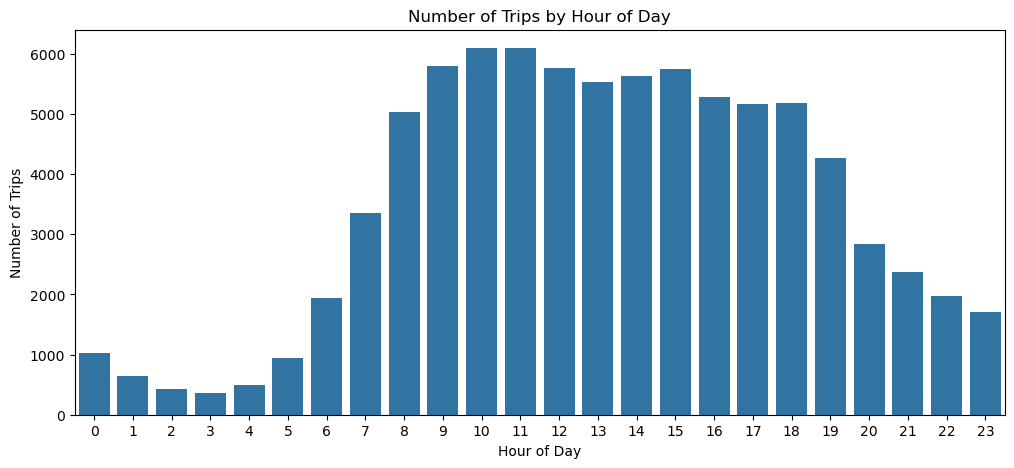

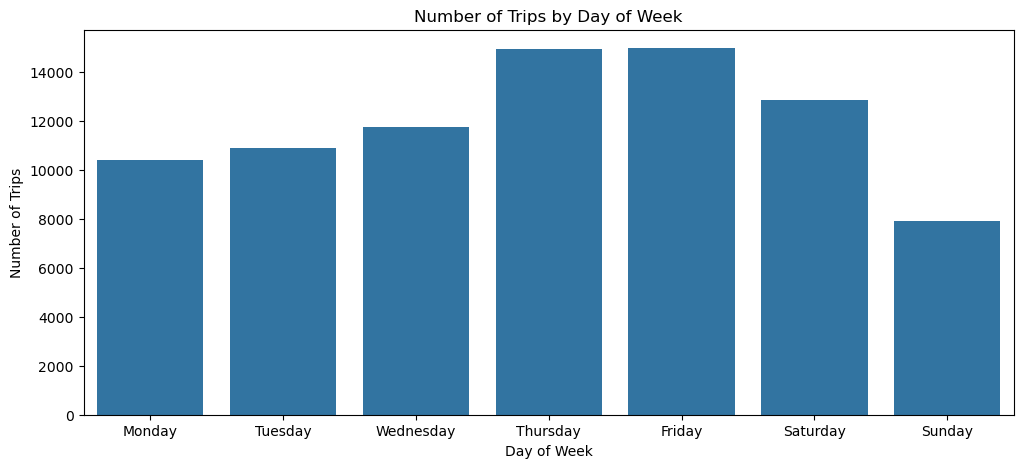

In [44]:
# 2. Trips by hour and day (to find peak demand times)
plt.figure(figsize=(12,5))
sns.countplot(x='pickup_hour', data=df)
plt.title('Number of Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

plt.figure(figsize=(12,5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='pickup_day', data=df, order=order)
plt.title('Number of Trips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.show()

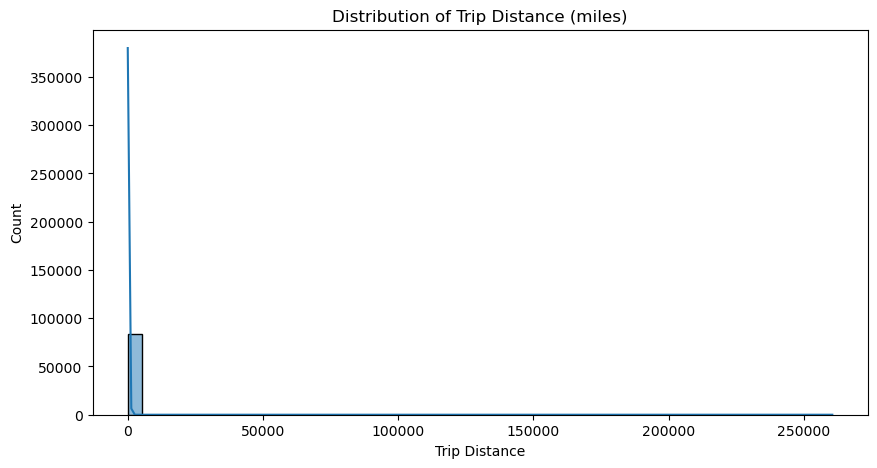

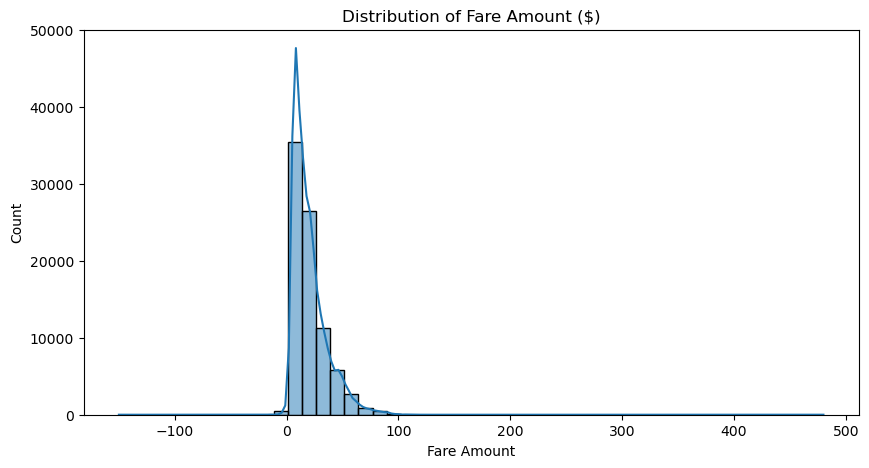

In [45]:
# 3. Distribution of trip distance and fare
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title('Distribution of Trip Distance (miles)')
plt.xlabel('Trip Distance')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount ($)')
plt.xlabel('Fare Amount')
plt.show()

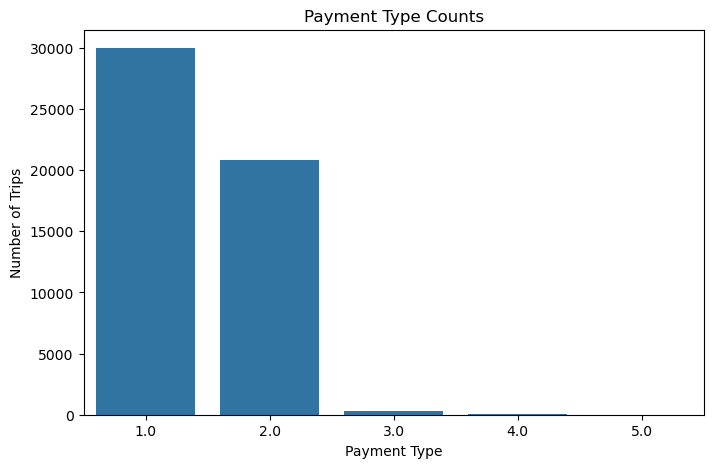

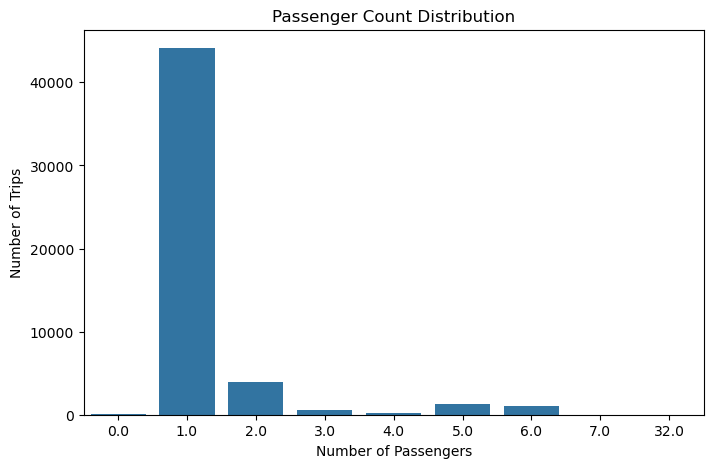

In [46]:
# 4. Payment types and passenger counts
plt.figure(figsize=(8,5))
sns.countplot(x='payment_type', data=df)
plt.title('Payment Type Counts')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='passenger_count', data=df)
plt.title('Passenger Count Distribution')
plt.xlabel('Number of Passengers')
plt.ylabel('Number of Trips')
plt.show()

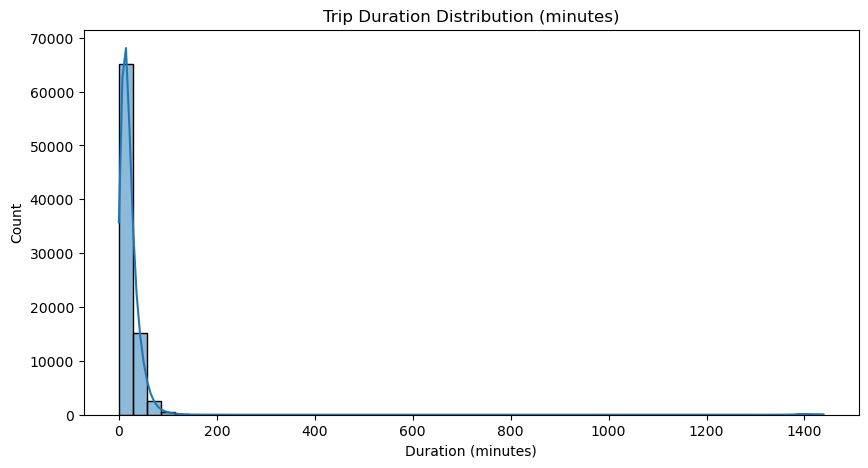

Average trip duration (minutes): 24.438299418894104


In [47]:
# 5. Analyzing trip durations
df['trip_duration_min'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60

plt.figure(figsize=(10,5))
sns.histplot(df['trip_duration_min'], bins=50, kde=True)
plt.title('Trip Duration Distribution (minutes)')
plt.xlabel('Duration (minutes)')
plt.show()

print("Average trip duration (minutes):", df['trip_duration_min'].mean())

Potential failed ride count: 4265
Percentage of potential failed rides: 5.096127421108601 %


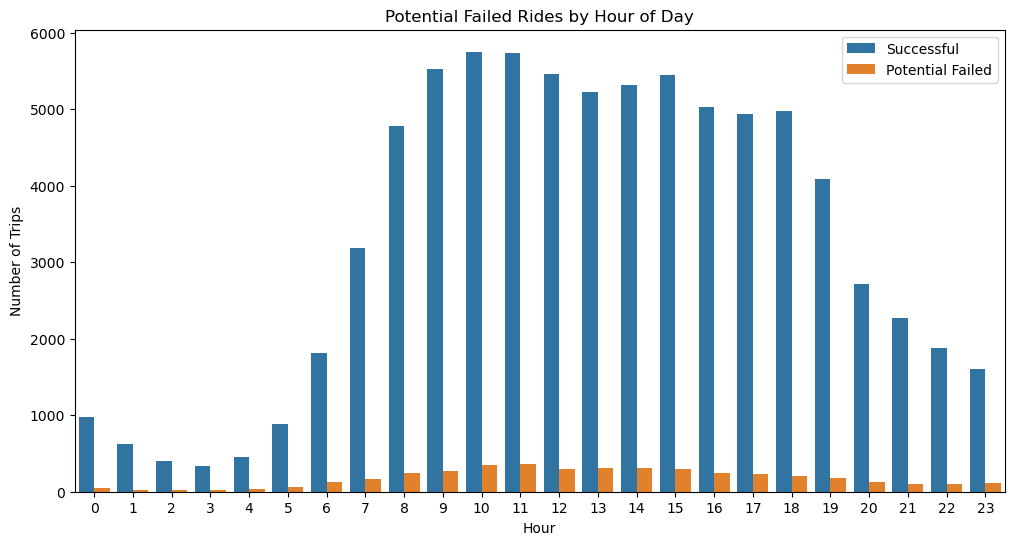

In [48]:
# 6. Potential "Failed Rides" proxy (trips with very short distance or fare)
# Flagging trips with distance < 0.1 miles or fare < $2 as potential failed/abnormal trips
df['potential_failed_ride'] = ((df['trip_distance'] < 0.1) | (df['fare_amount'] < 2)).astype(int)

print("Potential failed ride count:", df['potential_failed_ride'].sum())
print("Percentage of potential failed rides:", (df['potential_failed_ride'].mean()*100), "%")

# Visualizing potential failed rides by hour
plt.figure(figsize=(12,6))
sns.countplot(x='pickup_hour', hue='potential_failed_ride', data=df)
plt.title('Potential Failed Rides by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.legend(['Successful', 'Potential Failed'])
plt.show()


### INTERPRETA

#### 1. Peak hours have highest trip volumes → important for driver allocation.

#### 2. Potential failed rides mostly cluster around low distance/fare, indicating aborted or short trips.

#### 3. Payment types and passenger counts help understand customer preferences.

#### 4. Trip durations and distances offer insights into typical trip patterns.

